# GP Analysis: Based on Residuals 



In [1]:
import os 
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import scipy 
import scipy.stats as stats
from scipy.stats import sem 
from mpl_toolkits.mplot3d import Axes3D # <--- This is important for 3d plotting 
from sklearn.linear_model import LinearRegression
import json
import copy

## VE Data

In [2]:
dpath = '/Users/prachimahableshwarkar/Documents/GW/Depth_MTurk/verbal_judgement_analysis/data/finalVEMatched/z_scored/'

# dpath = '/Users/pmahableshwarkar/Documents/Depth_Project/verbal_judgement_analysis/data/finalVEMatched/z_scored/'


# stim 
with open(dpath + 'z_final_stim_125.npy' , 'rb') as f:
    stim_125 = np.load(f, allow_pickle=True)
    
with open(dpath + 'z_final_stim_250.npy' , 'rb') as f:
    stim_250 = np.load(f, allow_pickle=True)

with open(dpath + 'z_final_stim_1000.npy' , 'rb') as f:
    stim_1000 = np.load(f, allow_pickle=True)
    
# std 
with open(dpath + 'z_std_125.npy' , 'rb') as f:
    std_125 = np.load(f, allow_pickle=True)
    
with open(dpath + 'z_std_250.npy' , 'rb') as f:
    std_250 = np.load(f, allow_pickle=True)

with open(dpath + 'z_std_1000.npy' , 'rb') as f:
    std_1000 = np.load(f, allow_pickle=True)

# x data
with open(dpath + 'X_125.npy' , 'rb') as f:
    X_125 = np.load(f, allow_pickle=True)
with open(dpath + 'X_250.npy' , 'rb') as f:
    X_250 = np.load(f, allow_pickle=True)
with open(dpath + 'X_1000.npy' , 'rb') as f:
    X_1000 = np.load(f, allow_pickle=True)

# y data 
with open(dpath + 'z_final_y_125.npy' , 'rb') as f:
    y_125 = np.load(f, allow_pickle=True)
with open(dpath + 'z_final_y_250.npy' , 'rb') as f:
    y_250 = np.load(f, allow_pickle=True) 
with open(dpath + 'z_final_y_1000.npy' , 'rb') as f:
    y_1000= np.load(f, allow_pickle=True)
    
# residuals
with open(dpath + 'residuals/'+ 'z_residuals_125.npy' , 'rb') as f:
    residuals_125 = np.load(f, allow_pickle=True)
with open(dpath + 'residuals/'+ 'z_residuals_250.npy' , 'rb') as f:
    residuals_250 = np.load(f, allow_pickle=True) 
with open(dpath + 'residuals/'+ 'z_residuals_1000.npy' , 'rb') as f:
    residuals_1000= np.load(f, allow_pickle=True)
    
# difference between z-scored estimate and z-scored actual depth
with open(dpath + '/diff_125.npy' , 'rb') as f:
    diff_125 = np.load(f, allow_pickle=True)
with open(dpath + '/diff_250.npy' , 'rb') as f:
    diff_250 = np.load(f, allow_pickle=True) 
with open(dpath + '/diff_1000.npy' , 'rb') as f:
    diff_1000= np.load(f, allow_pickle=True)
    
# difference between raw estimate and raw actual depth
with open('/Users/prachimahableshwarkar/Documents/GW/Depth_MTurk/verbal_judgement_analysis/data/finalVEMatched/raw' + '/raw_diff_125.npy' , 'rb') as f:
    raw_diff_125 = np.load(f, allow_pickle=True)
with open('/Users/prachimahableshwarkar/Documents/GW/Depth_MTurk/verbal_judgement_analysis/data/finalVEMatched/raw' + '/raw_diff_250.npy' , 'rb') as f:
    raw_diff_250 = np.load(f, allow_pickle=True) 
with open('/Users/prachimahableshwarkar/Documents/GW/Depth_MTurk/verbal_judgement_analysis/data/finalVEMatched/raw' + '/raw_diff_1000.npy' , 'rb') as f:
    raw_diff_1000= np.load(f, allow_pickle=True)

## Load image data

In [3]:
stimuli_path = '/Users/prachimahableshwarkar/Documents/GW/Depth_MTurk/depth_duration_stimuli'
kinect192_path = '/Users/prachimahableshwarkar/Documents/GW/SUNRGBD/updated/kinect2data_192'

# stimuli_path = '/Users/pmahableshwarkar/Documents/Depth_Project/final_stimuli'
# kinect192_path = '/Users/pmahableshwarkar/Documents/Depth_Project/SUNRGBD/kinect2data_192'

targetDepths = {}

for stim in os.listdir(stimuli_path):
    if 'resize' in stim:
        p = stimuli_path + '/' + stim + '/data.json'
        data = json.load(open(p))
        target_depth = data['objects'][0]['crossing_point'][0]['depth']
        targetDepths[stim[:-2]] = target_depth


In [4]:
targetDepths['000866_2014-06-09_20-45-42_260595134347_rgbf000139-resize']



3.2155

## Load Ground Plane Metrics: Pixel SA

In [5]:
# path = '/Users/pmahableshwarkar/Documents/Depth_Project/SUN_scene_cue_coding/VGP_size_dict.json'
path = '/Users/prachimahableshwarkar/Documents/GW/Depth_MTurk/SUN_scene_cue_coding/VGP_size_dict.json'

vgp_size_dict = json.load(open(path))



In [6]:
# path = '/Users/pmahableshwarkar/Documents/Depth_Project/SUN_scene_cue_coding/GP_size_dict.json'
path = '/Users/prachimahableshwarkar/Documents/GW/Depth_MTurk/SUN_scene_cue_coding/GP_size_dict.json'

gp_size_dict = json.load(open(path))

In [7]:
VGPS = []
GPS = []
TDS = []
for key in vgp_size_dict:
    try:
        gp = gp_size_dict[key]
        VGPS.append(vgp_size_dict[key])
        GPS.append(gp)
        TDS.append(targetDepths[key])
    except:
        pass

print(stats.pearsonr(VGPS, GPS))
print(stats.pearsonr(VGPS, TDS))
print(stats.pearsonr(GPS, TDS))

(0.6305436407876517, 4.100796404472425e-18)
(0.1465931961258253, 0.07247634775275881)
(0.2664505181464459, 0.0009430642237052936)


In [8]:
# Find GP Outliers 

gpsize_list = [[key, gp_size_dict[key]] for key in gp_size_dict]
gpsize_mean = np.mean(np.array([elem[1] for elem in gpsize_list]))
gpsize_std = np.std(np.array([elem[1] for elem in gpsize_list]))

gpsize_outlierRange = [gpsize_mean - (3*gpsize_std), gpsize_mean + (3*gpsize_std)]

cleaned_gpsize_dict = {}
for key in gp_size_dict:
    if gpsize_outlierRange[0] < gp_size_dict[key] < gpsize_outlierRange[1]:
        cleaned_gpsize_dict[key] = gp_size_dict[key]
    else:
        print(key, 'excluded')

002118_2014-06-25_20-32-08_260595134347_rgbf000078-resize excluded
002657_2014-06-13_15-29-54_094959634447_rgbf000150-resize excluded


In [9]:
# Find VGP Outliers 

vgpsize_list = [[key, vgp_size_dict[key]] for key in vgp_size_dict]
vgpsize_mean = np.mean(np.array([elem[1] for elem in vgpsize_list]))
vgpsize_std = np.std(np.array([elem[1] for elem in vgpsize_list]))

vgpsize_outlierRange = [vgpsize_mean - (3*vgpsize_std), vgpsize_mean + (3*vgpsize_std)]

cleaned_vgpsize_dict = {}
for key in vgp_size_dict:
    if vgpsize_outlierRange[0] < vgp_size_dict[key] < vgpsize_outlierRange[1]:
        cleaned_vgpsize_dict[key] = vgp_size_dict[key]
    else:
        print(key, 'excluded')

002568_2014-06-24_13-59-21_094959634447_rgbf000062-resize excluded
002600_2014-06-24_14-27-04_094959634447_rgbf000074-resize excluded
002118_2014-06-25_20-32-08_260595134347_rgbf000078-resize excluded
002570_2014-06-24_13-59-54_094959634447_rgbf000059-resize excluded


In [10]:
stim_125[0]

'depth_duration_stimuli/002272_2014-06-28_18-53-56_260595134347_rgbf000067-resize_2/002272_2014-06-28_18-53-56_260595134347_rgbf000067-resize_2-target.png'

In [11]:
ordered_gp_size = []
ordered_vgp_size = []
ordered_tds_gp = []
ordered_tds_vgp = []

gp_none = 0
vgp_none = 0
for img in stim_125:
    folder = img.split('/')[1][:-2]
    try:
        ordered_gp_size.append(cleaned_gpsize_dict[folder])
        ordered_tds_gp.append(targetDepths[folder])
    except:
        gp_none += 1
        ordered_gp_size.append(None)
        ordered_tds_gp.append(None)

    try:
        ordered_vgp_size.append(cleaned_vgpsize_dict[folder])
        ordered_tds_vgp.append(targetDepths[folder])
    except:
        vgp_none += 1
        ordered_vgp_size.append(None)
        ordered_tds_vgp.append(None)



In [12]:
len(ordered_gp_size), len(ordered_tds_gp), len(ordered_vgp_size), len(ordered_tds_vgp)

(156, 156, 156, 156)

## Linear Model: GP x Target Depth

In [13]:
gpvals = [elem for elem in ordered_gp_size if elem != None]
gp_tdvals = [elem for elem in ordered_tds_gp if elem != None]


m: [2.53282356]
b: 10.458699577467083
R-squared:  0.06596831589686336
Corr, p-val (0.25684297906865816, 0.0015669902616939355)


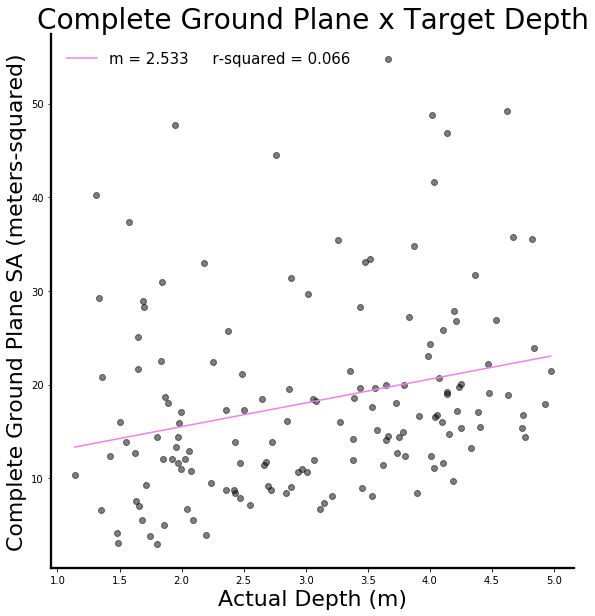

In [14]:
from sklearn.linear_model import LinearRegression

fig, ax = plt.subplots(figsize=[8,8])
plt.tight_layout()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(2.3)
    
#run regression
X = np.array(gp_tdvals).reshape(-1,1)
y = gpvals
reg = LinearRegression().fit(X, y)

#Generated Predictions
y_predicted = reg.predict(X)
#Plot Our Actual and Predicted Values
plt.plot(X, y, 'o', color='black', alpha = 0.5);
plt.plot(X,y_predicted,color='violet', label = 'm = ' + str(round(reg.coef_[0], 3))
         + '     r-squared = ' + str(round(float(reg.score(X, y)), 3)))
plt.title("Complete Ground Plane x Target Depth", fontsize = 28)
plt.xlabel("Actual Depth (m)", fontsize = 22)
plt.ylabel("Complete Ground Plane SA (meters-squared)", fontsize = 22)

# plt.xticks(np.arange(1, 6, 1), fontsize=15)
# plt.yticks(np.arange(-1,1.5, 0.5), fontsize=15)
# plt.ylim(-1.5,1.5)

legend = plt.legend(loc = 0, fontsize = 15, borderpad = 0.6, labelspacing = 1, frameon=False)

#get coefficients and y intercept
print("m: {0}".format(reg.coef_))
print("b: {0}".format(reg.intercept_))

#Returns the coefficient of determination R^2 of the prediction.
print("R-squared: ", reg.score(X, y))
print("Corr, p-val", stats.pearsonr(gpvals, gp_tdvals))

gpTD_residuals = copy.deepcopy(y - y_predicted)

## Linear Model: GP x Target Depth

In [15]:
vgpvals = [elem for elem in ordered_vgp_size if elem != None]
vgp_tdvals = [elem for elem in ordered_tds_vgp if elem != None]

m: [0.82143443]
b: 5.135610786232633
R-squared:  0.03337779577523614
Corr, p-val (0.18269591066916654, 0.026771329251583455)


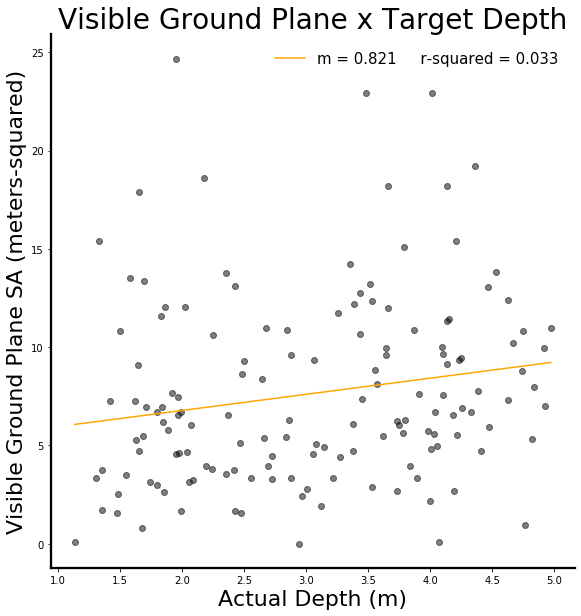

In [16]:
from sklearn.linear_model import LinearRegression

fig, ax = plt.subplots(figsize=[8,8])
plt.tight_layout()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(2.3)
    
#run regression
X = np.array(vgp_tdvals).reshape(-1,1)
y = vgpvals
reg = LinearRegression().fit(X, y)

#Generated Predictions
y_predicted = reg.predict(X)
#Plot Our Actual and Predicted Values
plt.plot(X, y, 'o', color='black', alpha = 0.5);
plt.plot(X,y_predicted,color='orange', label = 'm = ' + str(round(reg.coef_[0], 3))
         + '     r-squared = ' + str(round(float(reg.score(X, y)), 3)))
plt.title("Visible Ground Plane x Target Depth", fontsize = 28)
plt.xlabel("Actual Depth (m)", fontsize = 22)
plt.ylabel("Visible Ground Plane SA (meters-squared)", fontsize = 22)

# plt.xticks(np.arange(1, 6, 1), fontsize=15)
# plt.yticks(np.arange(-1,1.5, 0.5), fontsize=15)
# plt.ylim(-1.5,1.5)

legend = plt.legend(loc = 0, fontsize = 15, borderpad = 0.6, labelspacing = 1, frameon=False)

#get coefficients and y intercept
print("m: {0}".format(reg.coef_))
print("b: {0}".format(reg.intercept_))

#Returns the coefficient of determination R^2 of the prediction.
print("R-squared: ", reg.score(X, y))
print("Corr, p-val", stats.pearsonr(vgpvals, vgp_tdvals))

vgpTD_residuals = copy.deepcopy(y - y_predicted)

## Correlation 

In [17]:
folders_125 = [elem.split('/')[1][:-2] for elem in stim_125]
folders_250 = [elem.split('/')[1][:-2] for elem in stim_250]
folders_1000 = [elem.split('/')[1][:-2] for elem in stim_1000]


In [18]:
trunc_gpTDResid = []

gp_trunc_residuals_125 = []
gp_trunc_residuals_250 = []
gp_trunc_residuals_1000 = []

i = 0
for elem in cleaned_gpsize_dict:
    try:
        gp_trunc_residuals_125.append(residuals_125[folders_125.index(elem)])
        gp_trunc_residuals_250.append(residuals_250[folders_250.index(elem)])
        gp_trunc_residuals_1000.append(residuals_1000[folders_1000.index(elem)])
        
        trunc_gpTDResid.append(gpTD_residuals[i])

    except:
        pass
    i += 1

len(trunc_gpTDResid), len(gp_trunc_residuals_125)

(149, 149)

In [19]:
gp_trunc_residuals_avg = np.mean([np.array(gp_trunc_residuals_125), np.array(gp_trunc_residuals_250), np.array(gp_trunc_residuals_1000)], axis =0)


In [20]:
print('Correlation between residuals (VE x AD) and residuals (GP x target depth)')
print('125 ms: ',stats.pearsonr(gp_trunc_residuals_125, trunc_gpTDResid))
print('250 ms: ',stats.pearsonr(gp_trunc_residuals_250, trunc_gpTDResid))
print('1000 ms: ',stats.pearsonr(gp_trunc_residuals_1000, trunc_gpTDResid))

print('Avg: ',stats.pearsonr(gp_trunc_residuals_avg, trunc_gpTDResid))

print('All: ',stats.pearsonr(gp_trunc_residuals_125 + gp_trunc_residuals_250 + gp_trunc_residuals_1000, trunc_gpTDResid*3))


Correlation between residuals (VE x AD) and residuals (GP x target depth)
125 ms:  (-0.07523915804462757, 0.3617846374430345)
250 ms:  (-0.04338647908247282, 0.5993143432417005)
1000 ms:  (-0.02715695047650185, 0.7423358124850105)
Avg:  (-0.04977465262034628, 0.5466191255954392)
All:  (-0.048747342154920714, 0.3037804120374048)


In [21]:
trunc_vgpTDResid = []

vgp_trunc_residuals_125 = []
vgp_trunc_residuals_250 = []
vgp_trunc_residuals_1000 = []

i = 0
for elem in cleaned_vgpsize_dict:
    try:
        vgp_trunc_residuals_125.append(residuals_125[folders_125.index(elem)])
        vgp_trunc_residuals_250.append(residuals_250[folders_250.index(elem)])
        vgp_trunc_residuals_1000.append(residuals_1000[folders_1000.index(elem)])
        
        trunc_vgpTDResid.append(vgpTD_residuals[i])

    except:
        pass
    i += 1

len(trunc_vgpTDResid), len(vgp_trunc_residuals_125)

(147, 147)

In [22]:
vgp_trunc_residuals_avg = np.mean([np.array(vgp_trunc_residuals_125), np.array(vgp_trunc_residuals_250), np.array(vgp_trunc_residuals_1000)], axis =0)


In [23]:
print('Correlation between residuals (VE x AD) and residuals (VGP x target depth)')
print('125 ms: ',stats.pearsonr(vgp_trunc_residuals_125, trunc_vgpTDResid))
print('250 ms: ',stats.pearsonr(vgp_trunc_residuals_250, trunc_vgpTDResid))
print('1000 ms: ',stats.pearsonr(vgp_trunc_residuals_1000, trunc_vgpTDResid))

print('Avg: ',stats.pearsonr(vgp_trunc_residuals_avg, trunc_vgpTDResid))

print('All: ',stats.pearsonr(vgp_trunc_residuals_125 + vgp_trunc_residuals_250 + vgp_trunc_residuals_1000, trunc_vgpTDResid*3))


Correlation between residuals (VE x AD) and residuals (VGP x target depth)
125 ms:  (0.04545316986557463, 0.5846065123851671)
250 ms:  (0.05563399902304154, 0.5033126227652837)
1000 ms:  (0.010391595370983737, 0.9005875206269626)
Avg:  (0.03768796585195043, 0.6504029168472958)
All:  (0.03693940769931525, 0.4390549680942915)
